Design and Implement Multi-Layer Perceptron for CIFAR-10 Dataset with below requirements
Display total number of data with classes
Follow 70:30 Split ratio
Learning rate: 0.4
Optimizer of your choice
Use Minimum 3 hidden layers and Minimum 15 epochs
Display training and validation loss graph


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
import pandas as pd

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
cifar_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

class_counts = pd.Series([label for _, label in cifar_dataset]).value_counts().sort_index()
print("Total number of data with classes:\n", class_counts)

100%|██████████| 170M/170M [00:02<00:00, 84.4MB/s]


Total number of data with classes:
 0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: count, dtype: int64


In [3]:
train_size = int(0.7 * len(cifar_dataset))
val_size = len(cifar_dataset) - train_size
train_dataset, val_dataset = random_split(cifar_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [4]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*32*3, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.model(x)

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.4)

In [5]:
train_losses = []
val_losses = []
epochs = 15

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

Epoch 1/15, Train Loss: 1.7918, Val Loss: 1.5866
Epoch 2/15, Train Loss: 1.5445, Val Loss: 1.5479
Epoch 3/15, Train Loss: 1.4303, Val Loss: 1.5420
Epoch 4/15, Train Loss: 1.3252, Val Loss: 1.4732
Epoch 5/15, Train Loss: 1.2473, Val Loss: 1.5058
Epoch 6/15, Train Loss: 1.1786, Val Loss: 1.5435
Epoch 7/15, Train Loss: 1.1178, Val Loss: 1.5785
Epoch 8/15, Train Loss: 1.0551, Val Loss: 1.5836
Epoch 9/15, Train Loss: 1.0023, Val Loss: 1.6883
Epoch 10/15, Train Loss: 0.9617, Val Loss: 1.7199
Epoch 11/15, Train Loss: 0.9207, Val Loss: 1.7323
Epoch 12/15, Train Loss: 0.8825, Val Loss: 1.7897
Epoch 13/15, Train Loss: 0.8573, Val Loss: 1.8206
Epoch 14/15, Train Loss: 0.8397, Val Loss: 2.2260
Epoch 15/15, Train Loss: 0.8380, Val Loss: 1.9273


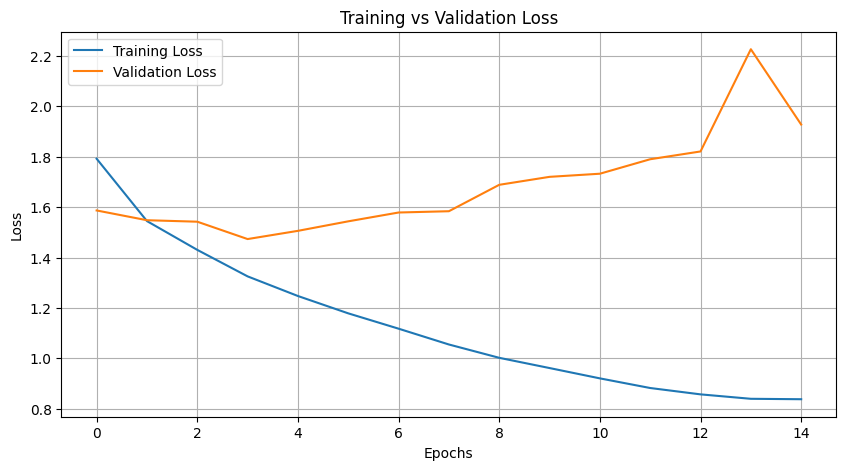

In [6]:
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.show()